# Candlestick Takuri (Dragonfly Doji with very long lower shadow)

https://patternswizard.com/takuri-candlestick-pattern/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2020-01-01'
end = '2021-10-22'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000


## Candlestick with Takuri (Dragonfly Doji with very long lower shadow)

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737426.0,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,True
1,737427.0,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,True
2,737430.0,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,True
3,737431.0,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,False
4,737432.0,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,False


Text(0, 0.5, 'Price')

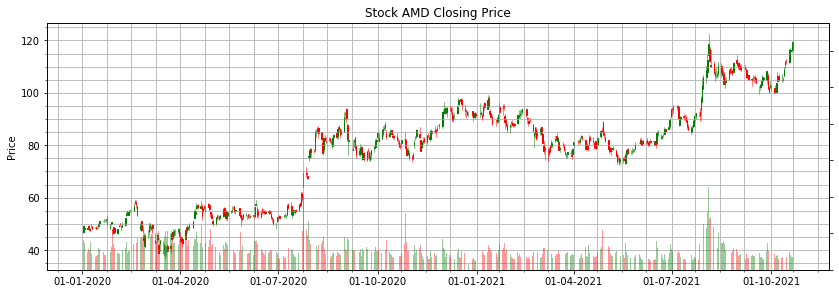

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
takuri = talib.CDLTAKURI(df['Open'], df['High'], df['Low'], df['Close'])

takuri = takuri[takuri != 0]

In [6]:
df['takuri'] = talib.CDLTAKURI(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['takuri'] !=0]

,Open,High,Low,Close,Adj Close,Volume,takuri
Date,,,,,,,
2020-02-14,55.189999,55.400002,54.560001,55.310001,55.310001,52365400,100
2020-03-02,47.419998,47.680000,44.660000,47.459999,47.459999,102324700,100
2020-03-10,45.410000,45.439999,43.099998,45.380001,45.380001,76228200,100
2020-06-02,53.450001,53.570000,52.009998,53.540001,53.540001,42855200,100
2020-06-29,50.150002,50.279999,48.419998,50.279999,50.279999,49905800,100
2020-11-05,83.269997,83.500000,81.849998,83.000000,83.000000,46542300,100
2020-12-16,97.040001,97.269997,95.459999,96.849998,96.849998,34909000,100
2020-12-22,93.360001,93.550003,90.529999,93.160004,93.160004,35673700,100
2021-01-19,89.559998,89.580002,87.239998,89.449997,89.449997,45115100,100


In [8]:
df['Adj Close'].loc[df['takuri'] !=0]

Date
2020-02-14    55.310001
2020-03-02    47.459999
2020-03-10    45.380001
2020-06-02    53.540001
2020-06-29    50.279999
2020-11-05    83.000000
2020-12-16    96.849998
2020-12-22    93.160004
2021-01-19    89.449997
2021-02-05    87.900002
2021-05-06    77.889999
2021-06-14    81.550003
Name: Adj Close, dtype: float64

In [9]:
df['takuri'].loc[df['takuri'] !=0].index

DatetimeIndex(['2020-02-14', '2020-03-02', '2020-03-10', '2020-06-02',
               '2020-06-29', '2020-11-05', '2020-12-16', '2020-12-22',
               '2021-01-19', '2021-02-05', '2021-05-06', '2021-06-14'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
takuri

Date
2020-02-14    100
2020-03-02    100
2020-03-10    100
2020-06-02    100
2020-06-29    100
2020-11-05    100
2020-12-16    100
2020-12-22    100
2021-01-19    100
2021-02-05    100
2021-05-06    100
2021-06-14    100
dtype: int32

In [11]:
takuri.index

DatetimeIndex(['2020-02-14', '2020-03-02', '2020-03-10', '2020-06-02',
               '2020-06-29', '2020-11-05', '2020-12-16', '2020-12-22',
               '2021-01-19', '2021-02-05', '2021-05-06', '2021-06-14'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,takuri
Date,,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,0
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,0
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,0
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,0
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,0
...,...,...,...,...,...,...,...
2021-10-15,112.510002,112.839996,111.110001,112.120003,112.120003,34177700,0
2021-10-18,111.900002,116.879997,111.370003,116.430000,116.430000,47537800,0
2021-10-19,116.160004,117.169998,114.470001,116.330002,116.330002,39593900,0


Text(0, 0.5, 'Price')

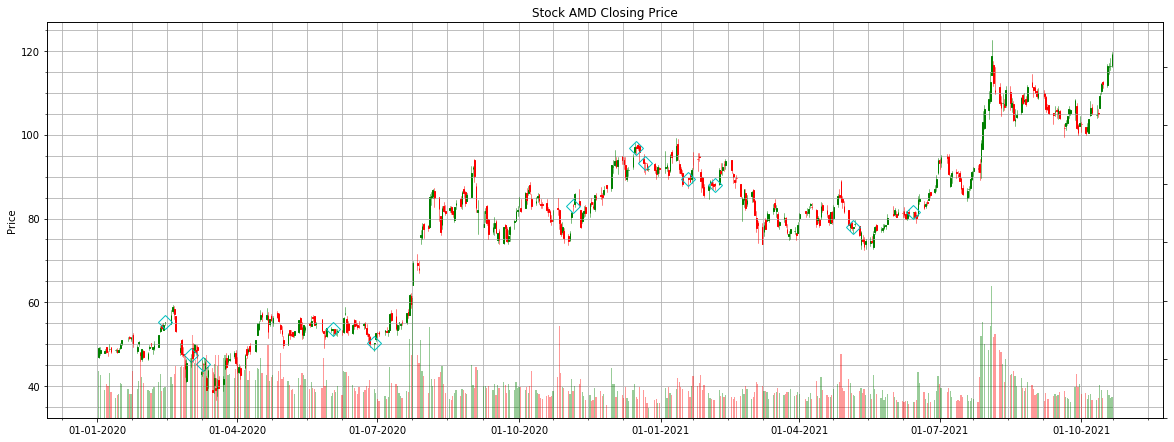

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['takuri'] !=0].index, df['Adj Close'].loc[df['takuri'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-06-01':'2021-07-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,takuri,VolumePositive
0,737942.0,81.010002,82.910004,80.660004,80.809998,80.809998,43433000,0,False
1,737943.0,81.000000,82.599998,80.660004,81.970001,81.970001,35203200,0,True
2,737944.0,81.129997,81.889999,80.260002,80.279999,80.279999,29812000,0,False
3,737945.0,80.919998,82.190002,80.809998,81.580002,81.580002,26387800,0,True
4,737948.0,81.400002,81.680000,80.379997,81.349998,81.349998,29006800,0,False


Text(0, 0.5, 'Price')

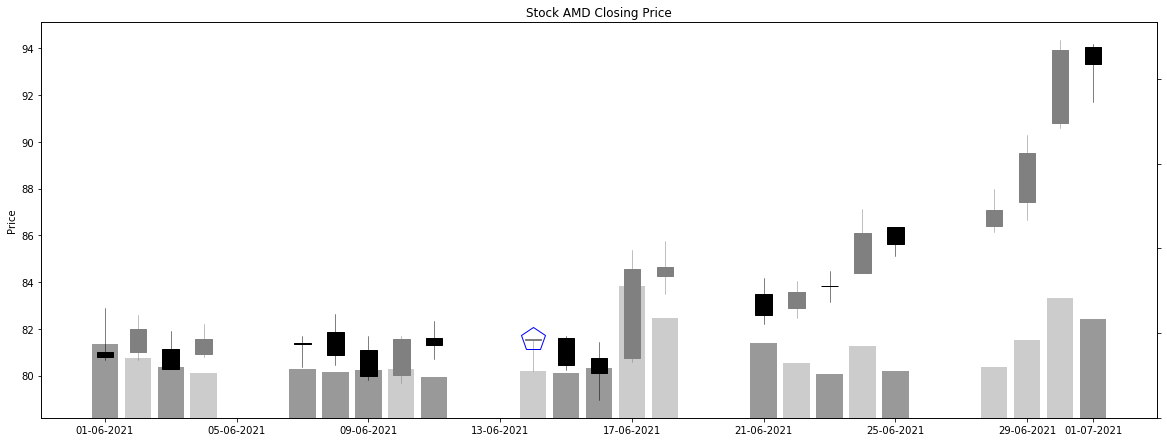

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('white')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='grey', colordown='black', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['takuri'] !=0].index, df['Adj Close'].loc[df['takuri'] !=0],
                'pb', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=25.0) 
colors = dfc.VolumePositive.map({True: 'grey', False: 'black'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

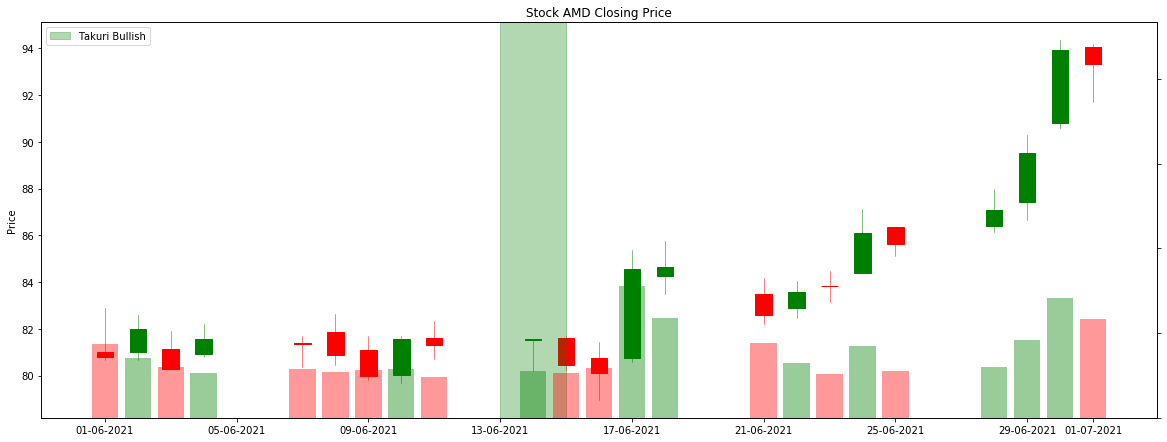

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,6,13)), date2num(datetime(2021,6,15)), 
           label="Takuri Bullish",color="green", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')